# Arc Consistency Algorithm

This notebook serves as supporting material for the **arc consistency algorithm** covered in **Lecture 5 - Constraint Satisfaction Problems** from the lecture *Grundlagen der Künstlichen Intelligenz (IN2062)* at the Technical University of Munich. This notebook uses implementations from [csp.py](https://github.com/aimacode/aima-python/blob/master/csp.py) module. Let's start by importing everything from the csp module.

## How to use this notebook
Clone the aima-python repository to your local machine, and add this notebook **directly** to the root directory of aima-python in order to make the following imports work.

There is also a bigger notebook, *csp.ipynb*, in the same root directory, which contains more examples from the book *Artificial Intelligence: A Modern Approach*. 

In [ ]:
from csp import CSP, parse_neighbors
from sortedcontainers import SortedSet
from operator import eq, neg
import sys, os
sys.path.append(os.path.realpath("aima"))
%matplotlib inline

def first(iterable, default=None):
    """Return the first element of an iterable; or default."""
    return next(iter(iterable), default)

## CONTENTS

* Arc Consistency Algorithm
* Problem Setup
* Arc Consistency Algorithm (Step-by-Step)
* Arc Consistency Algorithm (automatically)
* What's next

# Arc Consistency Algorithm

A possible solution to solve a constraint satisfaction problem is a backtracking search as presented in the lecture. Part of the backtracking search is the inference. During inference the search assigns a particular value to a variable and infers wether this assignment can lead to a solution or not. There can be no inference at all, resulting in a brute force tree search. Otherwise there can be inference using an arc consistecy algorithm such as AC3, which will be explained here.

Let us have a look at pseudocode and implementation, which you can find on slide 34.
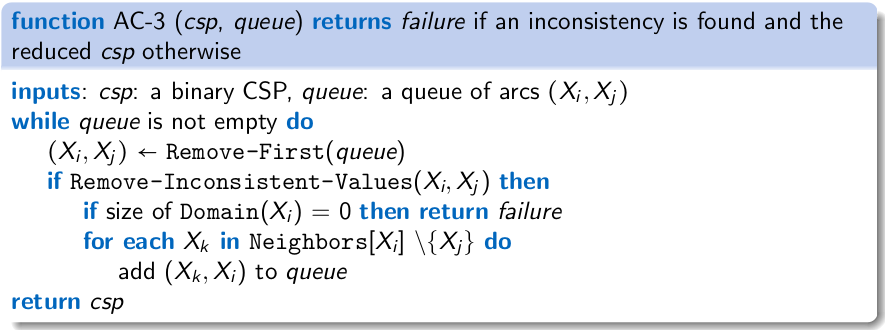

In [ ]:
def AC3(csp, queue=None, removals=None):
    """[Figure 6.3]"""
    if queue is None:
        queue = {(Xi, Xk) for Xi in csp.variables for Xk in csp.neighbors[Xi]}
        print(queue)
    csp.support_pruning()
    print('The current queue:\n{}'.format(queue))
    while queue:
        (Xi, Xj) = queue.pop()
        print('-'*30)
        print('Checking if {} is arc-consistent with {}.'.format(Xi, Xj))        
        if revise(csp, Xi, Xj, removals):
            print('{} was not consistent with {}. Domain of {} is now: {}'.format(Xi, Xj, Xi, csp.curr_domains[Xi]) )
            print('removals:',removals)
            if not csp.curr_domains[Xi]:
                print('Failure since size of Domain({})=0'.format(Xi))
                return False
            for Xk in csp.neighbors[Xi]:
                if Xk != Xj:
                    queue.append((Xk,Xi))
                    print('Added to queue ({}, {})'.format(Xk, Xi))
        else:
            print('{} is already arc-consistent with {}'.format(Xi, Xj))
    return True


Note that the function *revise* invoked in *AC3* performs the function *Remove-Inconsistent-Values* described in the pseudo code.
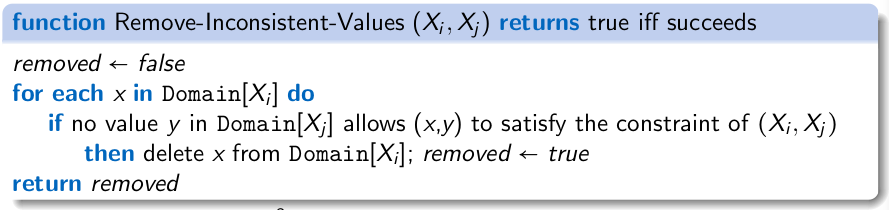

In [ ]:
def revise(csp, Xi, Xj, removals):
    """Return true if we remove a value."""
    revised = False
    for x in csp.curr_domains[Xi][:]:
        # If Xi=x conflicts with Xj=y for every possible y, eliminate Xi=x
        if all(not csp.constraints(Xi, x, Xj, y) for y in csp.curr_domains[Xj]):
            csp.prune(Xi, x, removals)
            revised = True
    return revised


# Problem Setup


We show an example for applying the arc consistency algorithm (AC-3) after an assignment (see **Lecture 3, Slides 36-43**).
We assign WA=red. After applying the arc consistency algorithm once, we remove red from NT, and just assign Q=green. 

Note that we omit Tasmania in the CSP.

In the following we set up our CSP.


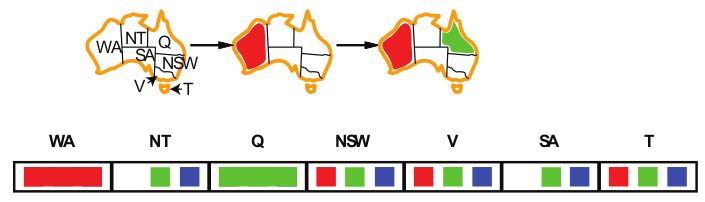

In [ ]:
neighbors = {
    'WA': ['NT', 'SA'], 
    'NT': ['WA', 'SA', 'Q'], 
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'], 
    'Q': ['NT', 'SA', 'NSW'], 
    'NSW': ['Q', 'SA', 'V'], 
    'V': ['SA', 'NSW'] }

domains = {'WA': ['R'], 'NT': ['G', 'B'], 'Q': ['G'], 'NSW': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'],
           'SA': ['G', 'B'] }

def different_values_constraint(A, a, B, b):
    """A constraint saying two neighboring variables must differ in value."""
    return a != b

In [ ]:
csp = CSP(variables=None, domains=domains, neighbors=neighbors, constraints=different_values_constraint)
print('Variables: {}'.format(csp.variables))
print('Domains: {}'.format(csp.domains))

# Arc Consistency Algorithm (Step-by-Step)

In order to show the steps of the arc-consistency algorithm, the part from the while loop in AC3 is extracted here. (make_arc_consistent)

In [ ]:
csp.support_pruning()
def make_arc_consistent(csp, queue, removals=[]):
    (Xi, Xj) = queue.pop(0)
    print('Checking if {} is arc-consistent with {}.'.format(Xi, Xj))        
    if revise(csp, Xi, Xj, removals):
        print('{} was not consistent with {}. Domain of {} is now: {}'.format(Xi, Xj, Xi, csp.curr_domains[Xi]) )
        print('removals:',removals)
        if not csp.curr_domains[Xi]:
            print('Failure since size of Domain({})=0'.format(Xi))
            return False
        for Xk in csp.neighbors[Xi]:
            if Xk != Xj:
                queue.append((Xk,Xi))
                print('Added to queue ({}, {})'.format(Xk, Xi))
    else:
        print('{} is already arc-consistent with {}'.format(Xi, Xj))

Now, we apply the arc-consistency algorithm:
1. add (NSW,Q), (SA,Q), (NT,Q) to queue: since Q has just been assigned, the queue is initialized with all arcs to neighbors of Q.

In [ ]:
removals = []
queue = [('NSW','Q'),('SA','Q'),('NT','Q')]

2. perform the AC-3 algorithm step by step

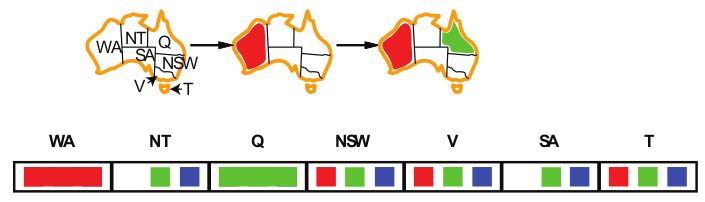

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

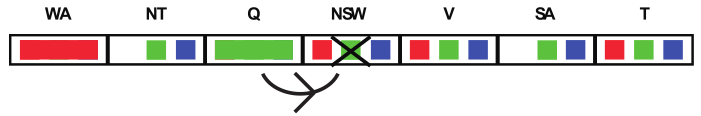

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

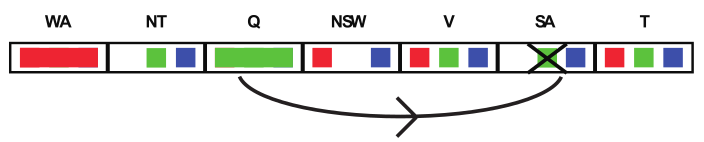

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

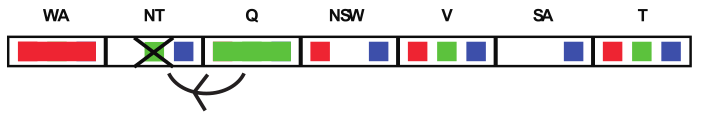

Note: 

In this notebook, (SA,NSW) was added to the queue before (V,NSW). Thus, arc-consistency is checked first for (SA,NSW), while in the lecture arc-consistency is checked first for (V,NSW).

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

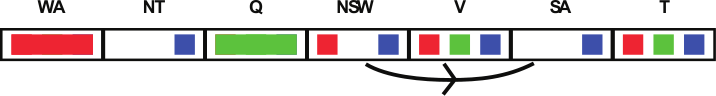

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

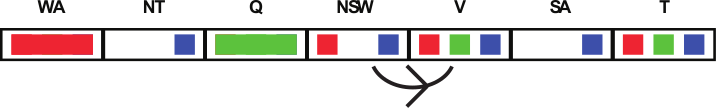

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

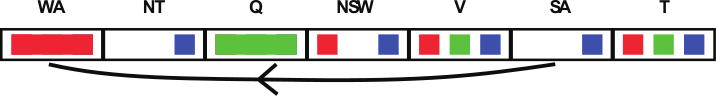

In [ ]:
print('The current queue:\n{}'.format(queue))
make_arc_consistent(csp, queue = queue, removals=removals)

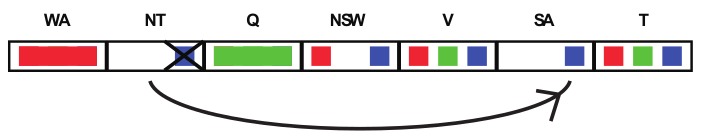

**Result**

The backtracking search algorithm receives a failure and knows that the CSP cannot be solved with the last assignment Q=green.
Thus, the search algorithm backtracks by removing the inconsistent assignment and restoring the modified domains.

# Arc Consistency Algorithm (automatically)

Note that in the previous section, we performed the internal steps of the AC-3 algorithm separately, but the function AC3 will perform them all automatically.

Let us perform the same example as before with the function AC3.

In [ ]:
neighbors = {
    'WA': ['NT', 'SA'], 
    'NT': ['WA', 'SA', 'Q'], 
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'], 
    'Q': ['NT', 'SA', 'NSW'], 
    'NSW': ['Q', 'SA', 'V'], 
    'V': ['SA', 'NSW'] }

domains = {'WA': ['R'], 'NT': ['G', 'B'], 'Q': ['G'], 'NSW': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'],
           'SA': ['G', 'B'] }

def different_values_constraint(A, a, B, b):
    """A constraint saying two neighboring variables must differ in value."""
    return a != b


In [ ]:
csp = CSP(variables=None, domains=domains, neighbors=neighbors, constraints=different_values_constraint)
print('Variables: {}'.format(csp.variables))
print('Domains: {}'.format(csp.domains))

In [ ]:
removals = []
queue = [('NSW','Q'),('SA','Q'),('NT','Q')]

In [ ]:
AC3(csp, queue = queue, removals=removals)

# Backtracking Search using AC3

Note that in the previous sections we only ran the inference part of the backtracking search. To do so we jumped into the constraint satisfaction problem in the middle of the search process (not all domains have all possible values left). Let's run the whole backtracking search using AC3 as an inference technique (see lecture slides 19ff).

! You don't have to fully understand the implementation as it relies on the AIMA CSP class. Feel free to play around with the initial csp to see whatever changes in the result.

1. Initialize CSP with domains containing all possible values.

In [ ]:
neighbors = {
    'WA': ['NT', 'SA'], 
    'NT': ['WA', 'SA', 'Q'], 
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'], 
    'Q': ['NT', 'SA', 'NSW'], 
    'NSW': ['Q', 'SA', 'V'], 
    'V': ['SA', 'NSW'] }

domains = {'WA': ['R', 'G', 'B'], 'NT': ['R', 'G', 'B'], 'Q': ['R', 'G', 'B'], 'NSW': ['R', 'G', 'B'], 'V': ['R', 'G', 'B'],
           'SA': ['R', 'G', 'B'] }

def different_values_constraint(A, a, B, b):
    """A constraint saying two neighboring variables must differ in value."""
    return a != b

csp = CSP(variables=None, domains=domains, neighbors=neighbors, constraints=different_values_constraint)
print('Variables: {}'.format(csp.variables))
print('Domains: {}'.format(csp.domains))

2. Define heuristics used in backtracking search

In [ ]:
def first_unassigned_variable(assignment, csp):
    """The default variable order."""
    return first([var for var in csp.variables if var not in assignment])

def unordered_domain_values(var, assignment, csp):
    """The default value order."""
    return csp.choices(var)

3. Define Inference to be AC3: Note that the AC3's implementation is slightly changed compared to the implementation above. The queue is now a set and not a list which is due to the backtracking search algorithm implementation.

In [ ]:
def AC3(csp, queue=None, removals=None):
    """[Figure 6.3]"""
    if queue is None:
        queue = {(Xi, Xk) for Xi in csp.variables for Xk in csp.neighbors[Xi]}
        print(queue)
    csp.support_pruning()
    print('The current queue:\n{}'.format(queue))
    while queue:
        (Xi, Xj) = queue.pop()
        print('-'*30)
        print('Checking if {} is arc-consistent with {}.'.format(Xi, Xj))        
        if revise(csp, Xi, Xj, removals):
            print('{} was not consistent with {}. Domain of {} is now: {}'.format(Xi, Xj, Xi, csp.curr_domains[Xi]) )
            print('removals:',removals)
            if not csp.curr_domains[Xi]:
                print('Failure since size of Domain({})=0'.format(Xi))
                return False
            for Xk in csp.neighbors[Xi]:
                if Xk != Xj:
                    queue.add((Xk,Xi))
                    print('Added to queue ({}, {})'.format(Xk, Xi))
        else:
            print('{} is already arc-consistent with {}'.format(Xi, Xj))
    return True

def mac(csp, var, value, assignment, removals, constraint_propagation=AC3):
    """Maintain arc consistency."""
    return constraint_propagation(csp, {(X, var) for X in csp.neighbors[var]}, removals)

4. Define backtracking search algorithm

In [ ]:
def backtracking_search(csp,
                        select_unassigned_variable=first_unassigned_variable,
                        order_domain_values=unordered_domain_values,
                        inference=mac):

    def backtrack(assignment):
        if len(assignment) == len(csp.variables):
            return assignment
        var = select_unassigned_variable(assignment, csp)
        for value in order_domain_values(var, assignment, csp):
            if 0 == csp.nconflicts(var, value, assignment):
                print('Try assignment of ' + value + ' to ' + var)
                csp.assign(var, value, assignment)
                removals = csp.suppose(var, value)
                if inference(csp, var, value, assignment, removals):
                    result = backtrack(assignment)
                    if result is not None:
                        return result
                csp.restore(removals)
        csp.unassign(var, assignment)
        return None

    result = backtrack({})
    assert result is None or csp.goal_test(result)
    print('Result:')
    return result

5. Run it!

In [ ]:
backtracking_search(csp)

# What's next

Congratulation on completing this notebook! Now you have a better understanding of the arc consistency algorithm. 

The next notebook is about ***Lecture 6: Logic***
